<a href="https://colab.research.google.com/github/beep1000101/pjatk_wum_project/blob/main/laboratory_windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib pandas scikit-learn --quiet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from pathlib import Path

In [4]:
import tensorflow as tf
import cv2 as cv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
def plot_history(history):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    print(history.history.keys())
    epoch = range(len(loss))

    ax1.plot(epoch, loss, label="Training Loss")
    ax1.plot(epoch, val_loss, label="Validation Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()

    ax2.plot(epoch, accuracy, label="Training Accuracy")
    ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.legend()

In [ ]:
data_dir = Path(os.getcwd()) / ".dataset"
train_directory = data_dir / "Training"
test_directory = data_dir / "Testing"

In [ ]:
_seed = 9118487
validation_split = .2

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='training',
    seed=_seed
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='validation',
    seed=_seed
)

test_dateset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    seed=_seed
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
for images, labels in train_dataset.take(1):
    img = images[0].numpy().astype("uint8")
    # label = labels[0].numpy()
    label = labels[0]
    input_data_shape = np.array(img).shape

label: 3
shape: (256, 256, 3)
image:


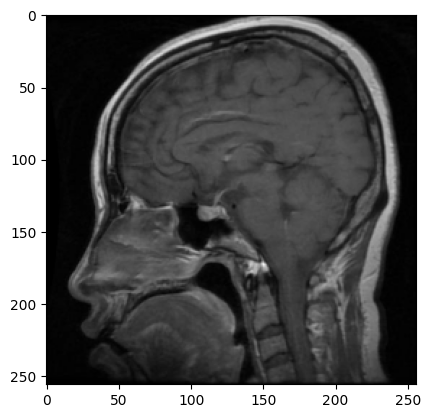

In [ ]:
print(f"label: {label}")
print(f"shape: {np.array(img).shape}")
print("image:")
plt.imshow(img)
plt.show()

# Model MLP

In [ ]:
mlp_model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=input_data_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')
    ]
)

mlp_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
mlp_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

mlp_history = mlp_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[mlp_early_stopping]
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.3313 - loss: 3664.2209 - val_accuracy: 0.2648 - val_loss: 1.7025
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.3003 - loss: 1.5692 - val_accuracy: 0.2648 - val_loss: 1.3626
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.3089 - loss: 1.5418 - val_accuracy: 0.2648 - val_loss: 1.3546
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3037 - loss: 1.3465 - val_accuracy: 0.2648 - val_loss: 1.3508
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3046 - loss: 1.3439 - val_accuracy: 0.2648 - val_loss: 1.3489
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.3063 - loss: 1.3480 - val_accuracy: 0.2648 - val_loss: 1.3477
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2932 - loss: 1.3511 - val_accuracy: 0.2648 - val_loss: 1.3475
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.2968 - loss: 1.3500 - val_accuracy: 0.264

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


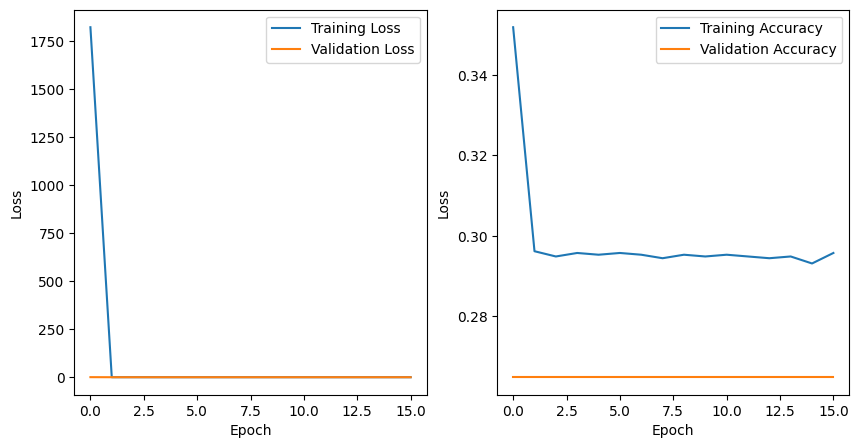

In [ ]:
plot_history(mlp_history)

In [ ]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.3002 - loss: 6.2066


In [ ]:
print(f"test accuracy: {mlp_test_acc:.4f}")

test accuracy: 0.2665


# cnn model very good one

In [ ]:
cnn_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

cnn_model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255, input_shape=input_data_shape),
        cnn_augumentation,
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(.3),
        tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax')
    ]
)

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
cnn_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

cnn_callbacks = [
    # cnn_early_stopping
    ]

cnn_history = cnn_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=cnn_callbacks
    )

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4533 - loss: 1.3281 - val_accuracy: 0.6115 - val_loss: 0.9203
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6240 - loss: 0.8830 - val_accuracy: 0.7387 - val_loss: 0.7609
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6628 - loss: 0.8044 - val_accuracy: 0.7352 - val_loss: 0.6439
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7208 - loss: 0.6683 - val_accuracy: 0.7753 - val_loss: 0.5527
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7534 - loss: 0.5845 - val_accuracy: 0.8171 - val_loss: 0.5087
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7720 - loss: 0.5467 - val_accuracy: 0.7805 - val_loss: 0.5219
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8160 - loss: 0.4765 - val_accuracy: 0.8258 - val_loss: 0.4645
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8193 - loss: 0.4576 - val_accuracy: 0.8171 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


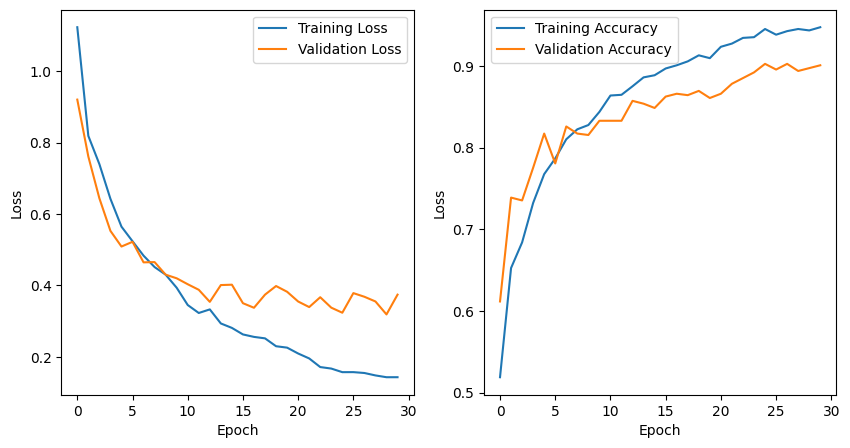

In [ ]:
plot_history(cnn_history)

In [ ]:
cnn_model_loss, cnn_model_acc = cnn_model.evaluate(test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6451 - loss: 6.2619


In [ ]:
print(f"test accuracy: {cnn_model_acc:.4f}")

test accuracy: 0.6269


In [ ]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,518,478 (169.82 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,678,986 (113.22 MB)

In [ ]:
# save cnn to drive
cnn_model.save(MODELS_PATH / 'cnn_model.keras')

# Automatyczne strojenie MLP z KerasTuner i EarlyStopping
W tej sekcji znajdziemy najlepszą architekturę MLP korzystając z KerasTuner oraz callbacku EarlyStopping.

In [ ]:
# Install KerasTuner if not already installed
try:
    import keras_tuner
except ImportError:
    !pip install keras-tuner --quiet
    import keras_tuner

In [ ]:
_seed = 9118487
validation_split = .2

mlp_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='training',
    seed=_seed
)

mlp_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    validation_split=validation_split,
    subset='validation',
    seed=_seed
)

mlp_test_dateset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    seed=_seed
)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [ ]:
def build_mlp_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_data_shape))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
        if hp.Boolean('use_dropout'):
            model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(tf.keras.layers.Dense(len(train_dataset.class_names), activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_mlp_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='mlp_tuner_dir',
    project_name='mlp_tuning'
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tuner.search(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stop]
)

best_hps = tuner.get_best_hyperparameters(1)[0]
print('Najlepsze hiperparametry:')
for k, v in best_hps.values.items():
    print(f'{k}: {v}')

Trial 10 Complete [00h 00m 25s]
val_accuracy: 0.5662021040916443

Best val_accuracy So Far: 0.7787456512451172
Total elapsed time: 00h 03m 12s
Najlepsze hiperparametry:
num_layers: 2
units_0: 224
activation: relu
use_dropout: False
learning_rate: 0.002479367058119384
units_1: 64


In [ ]:
# Trenowanie i ocena najlepszego modelu MLP
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stop]
)

mlp_tuned_test_loss, mlp_tuned_test_acc = best_model.evaluate(test_dateset)
print(f"Tuned MLP test accuracy: {mlp_tuned_test_acc:.4f}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3585 - loss: 12073.6797 - val_accuracy: 0.6098 - val_loss: 1092.5924
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5790 - loss: 1054.9661 - val_accuracy: 0.6585 - val_loss: 645.9103
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6586 - loss: 603.5335 - val_accuracy: 0.6882 - val_loss: 445.9931
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7211 - loss: 339.0092 - val_accuracy: 0.6307 - val_loss: 455.4537
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7083 - loss: 306.3731 - val_accuracy: 0.7439 - val_loss: 261.1574
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7743 - loss: 241.1729 - val_accuracy: 0.6672 - val_loss: 404.1826
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8121 - loss: 125.2389 - val_accuracy: 0.7265 - val_loss: 304.2503
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7215 - loss: 273.1783 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


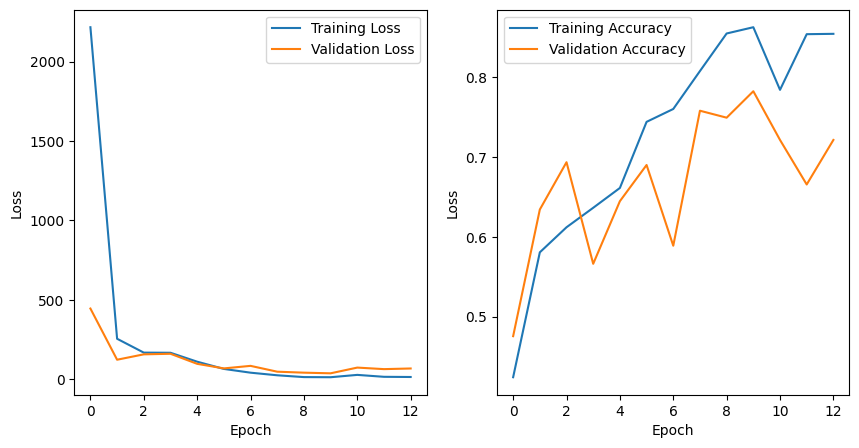

In [ ]:
plot_history(history)

In [ ]:
tuned_mlp_loss, tuned_mlp_accuracy = best_model.evaluate(test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6191 - loss: 357.0357


In [ ]:
print(f"Tuned MLP test accuracy: {tuned_mlp_accuracy:.4f}")

Tuned MLP test accuracy: 0.6168


In [ ]:
MODELS_PATH = Path('/content/drive/MyDrive/school/pjatk/wum_models')

In [ ]:
best_model.save(MODELS_PATH / 'best_mlp_model.keras')

In [ ]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 224)            │    44,040,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,165,230 (504.17 MB)

 Trainable params: 44,055,076 (168.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,110,154 (336.11 MB)

# CNN TRAINING

In [ ]:
_seed = 9118487
validation_split = .15

cnn_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    validation_split=validation_split,
    subset='training',
    seed=_seed
)

cnn_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    validation_split=validation_split,
    subset='validation',
    seed=_seed
)

cnn_test_dateset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    seed=_seed
)
cnn_test_dateset = cnn_test_dateset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 2870 files belonging to 4 classes.
Using 2440 files for training.
Found 2870 files belonging to 4 classes.
Using 430 files for validation.
Found 394 files belonging to 4 classes.


In [ ]:
for images, labels in train_dataset.take(1):
    cnn_img = images[0].numpy().astype("uint8")
    # label = labels[0].numpy()
    cnn_label = labels[0]
    cnn_input_data_shape = np.array(img).shape

In [ ]:
from tensorflow.keras.regularizers import l2

# automatyczne budowanie

In [ ]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import Hyperband

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Rescaling(1./255, input_shape=cnn_input_data_shape))

    # Bloki konwolucyjne
    for i in range(hp.Int('conv_blocks', 1, 4)):
        model.add(tf.keras.layers.Conv2D(
            filters=hp.Int('filters_' + str(i), 32, 256, step=32),
            kernel_size=3,
            activation='relu',
            padding='same'))
        model.add(tf.keras.layers.MaxPooling2D())
        if hp.Boolean('dropout_' + str(i)):
            model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', 64, 256, step=32),
        activation='relu'))
    model.add(tf.keras.layers.Dense(len(cnn_train_dataset.class_names), activation='softmax'))

    # optimizer = tf.keras.optimizers.Adam(
    #     learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'),
    #     beta_1=hp.Float('beta_1', 0.8, 0.999, sampling='linear'),
    #     beta_2=hp.Float('beta_2', 0.9, 0.999, sampling='linear'),
    #     epsilon=hp.Float('epsilon', 1e-7, 1e-5, sampling='linear'),
    # )

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    directory='auto_model_dir',
    project_name='cnn_tuning')

tuner.search(cnn_train_dataset, validation_data=cnn_validation_dataset, epochs=10)

Trial 30 Complete [00h 00m 42s]
val_accuracy: 0.695348858833313

Best val_accuracy So Far: 0.8488371968269348
Total elapsed time: 00h 16m 14s


In [ ]:
# get best model
cnn_tunned_model = tuner.get_best_models(num_models=1)[0]

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# train best model
tuned_cnn_model_history = cnn_tunned_model.fit(
    cnn_train_dataset,
    validation_data=cnn_validation_dataset,
    epochs=20,
    callbacks=callbacks
    )

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.7610 - loss: 0.5680 - val_accuracy: 0.8023 - val_loss: 0.5249
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7605 - loss: 0.5289 - val_accuracy: 0.7721 - val_loss: 0.5788
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7557 - loss: 0.5332 - val_accuracy: 0.7860 - val_loss: 0.5604
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7821 - loss: 0.4853 - val_accuracy: 0.8116 - val_loss: 0.4953
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7900 - loss: 0.4723 - val_accuracy: 0.7326 - val_loss: 0.6305
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7867 - loss: 0.5023 - val_accuracy: 0.8140 - val_loss: 0.4796
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8096 - loss: 0.4254 - val_accuracy: 0.7744 - val_loss: 0.5122
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7929 - loss: 0.4612 - val_accuracy: 0.8233 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


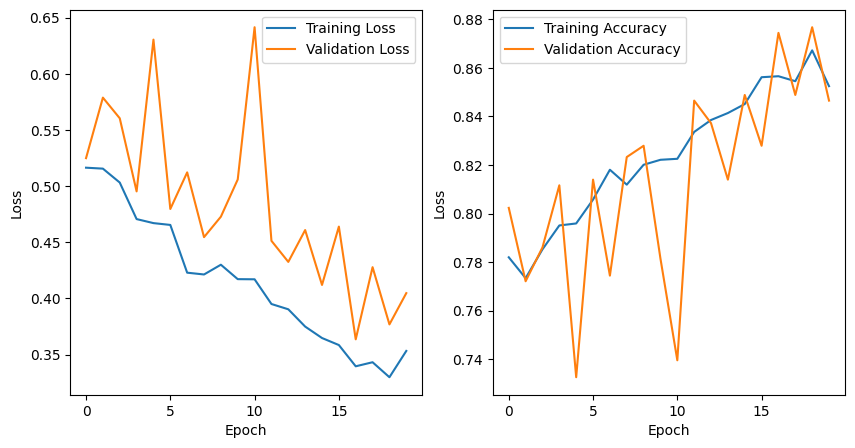

In [ ]:
plot_history(tuned_cnn_model_history)

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 224)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 224)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 224)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │       258,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 160)    │       368,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 160)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,816,942 (10.75 MB)

 Trainable params: 938,980 (3.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,877,962 (7.16 MB)

In [ ]:
best_model.evaluate(cnn_test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4038 - loss: 4.2842


[3.909665584564209, 0.39340102672576904]

# golden cnn

In [ ]:
_seed = 9118487
validation_split = .2
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
image_size = (IMAGE_HEIGHT, IMAGE_WIDTH)
batch_size = 32


cnn_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    validation_split=validation_split,
    subset='training',
    seed=_seed,
    image_size=image_size
)

cnn_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    validation_split=validation_split,
    subset='validation',
    seed=_seed,
    image_size=image_size
)

cnn_test_dateset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    seed=_seed,
    image_size=image_size
)

labeled_weights = {'glioma_tumor': 0.28780487804878047,
 'meningioma_tumor': 0.286411149825784,
 'no_tumor': 0.13763066202090593,
 'pituitary_tumor': 0.2881533101045296}


cnn_train_dataset = cnn_train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

cnn_validation_dataset = cnn_validation_dataset.cache().prefetch(tf.data.AUTOTUNE)

cnn_test_dateset = cnn_test_dateset.cache().prefetch(tf.data.AUTOTUNE)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.
Found 394 files belonging to 4 classes.


In [ ]:
def create_cnn_model(input_shape=(224, 224, 3), num_classes=4):
    model = tf.keras.Sequential()

    # Block 1
    model.add(tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=tf.keras.regularizers.l2(.001),
        input_shape=input_shape
    ))
    model.add(tf.keras.layers.BatchNormalization())

    # Block 2
    model.add(tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=tf.keras.regularizers.l2(.001)
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(tf.keras.layers.Dropout(0.5))

    # Block 3
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=tf.keras.regularizers.l2(.001)
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(tf.keras.layers.Dropout(0.6))

    # Fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=512,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(.001)
    ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
cnn_model = create_cnn_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 224, 224, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,451,172 (24.61 MB)

 Trainable params: 6,449,924 (24.60 MB)

 Non-trainable params: 1,248 (4.88 KB)

In [ ]:
cnn_history = cnn_model.fit(
    cnn_train_dataset,
    validation_data=cnn_validation_dataset,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler]
    )

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.5658 - loss: 2.6306 - val_accuracy: 0.5714 - val_loss: 2.6391 - learning_rate: 0.0010
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7248 - loss: 1.8790 - val_accuracy: 0.7038 - val_loss: 1.8225 - learning_rate: 0.0010
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7796 - loss: 1.6345 - val_accuracy: 0.8101 - val_loss: 1.5882 - learning_rate: 0.0010
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8177 - loss: 1.4779 - val_accuracy: 0.8031 - val_loss: 1.5187 - learning_rate: 0.0010
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8394 - loss: 1.3984 - val_accuracy: 0.7491 - val_loss: 1.5744 - learning_rate: 0.0010
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8606 - loss: 1.3049 - val_accuracy: 0.8014 - val_loss: 1.4193 - learning_rate: 0.0010
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8839 - loss: 1.1887 - val_ac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


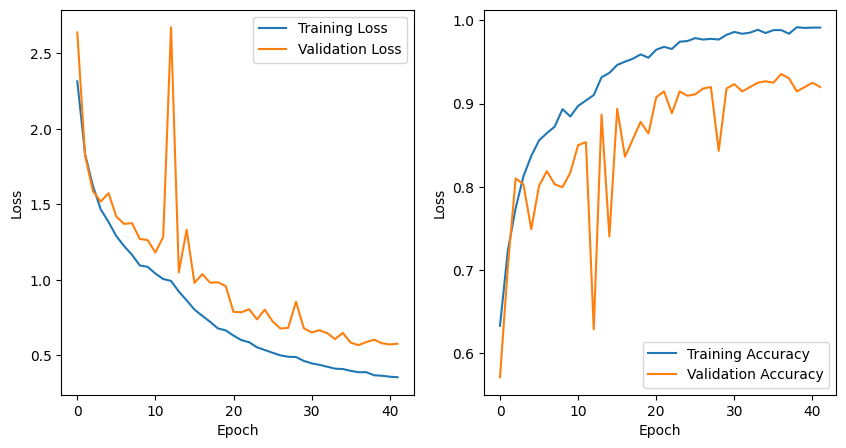

In [ ]:
plot_history(cnn_history)

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(cnn_test_dateset)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7270 - loss: 2.2624


In [ ]:
print(f"test accuracy: {cnn_accuracy:.4f}")

test accuracy: 0.7360


In [ ]:
# save prime cnn model
cnn_model.save(MODELS_PATH / 'cnn_model.keras')